##Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

##Data preprocessing including visualization

<Axes: xlabel='pH', ylabel='Count'>

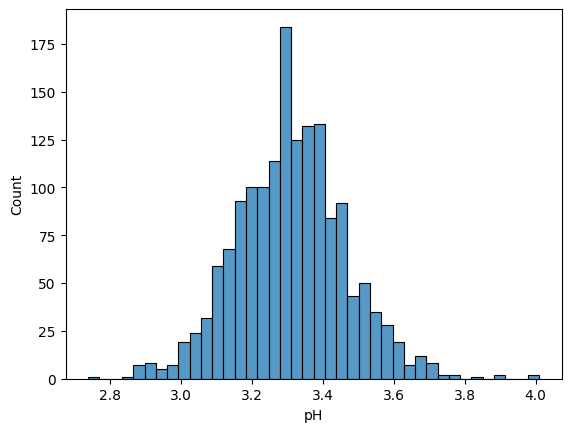

In [5]:
sns.histplot(df.pH)

<ipython-input-6-8b271c44c149>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.sulphates)


<Axes: xlabel='sulphates', ylabel='Density'>

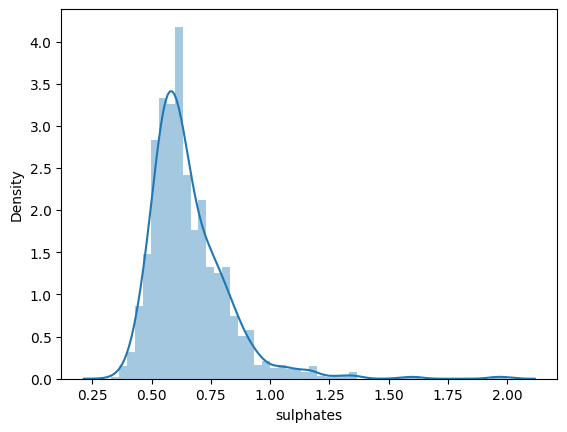

In [6]:
sns.distplot(df.sulphates)

<ipython-input-7-cc0e16fd78a8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.alcohol)


<Axes: xlabel='alcohol', ylabel='Density'>

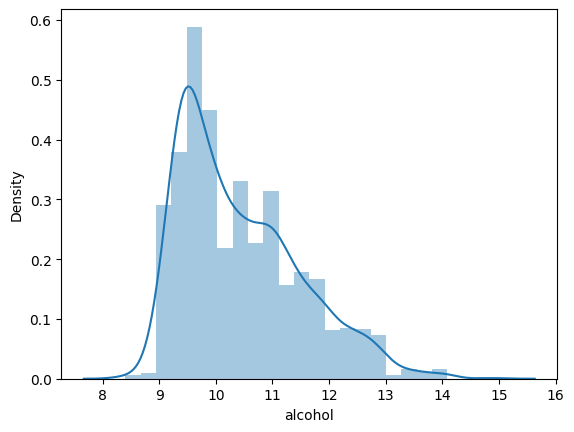

In [7]:
sns.distplot(df.alcohol)

<Axes: xlabel='sulphates', ylabel='pH'>

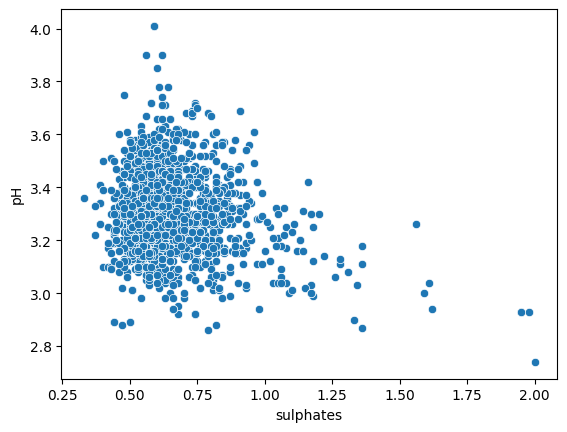

In [8]:
sns.scatterplot(x=df.sulphates, y=df.pH)

<Axes: xlabel='chlorides', ylabel='pH'>

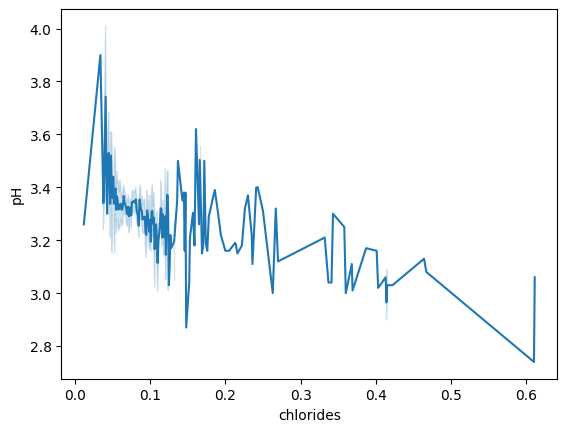

In [9]:
sns.lineplot(x=df.chlorides, y=df.pH)

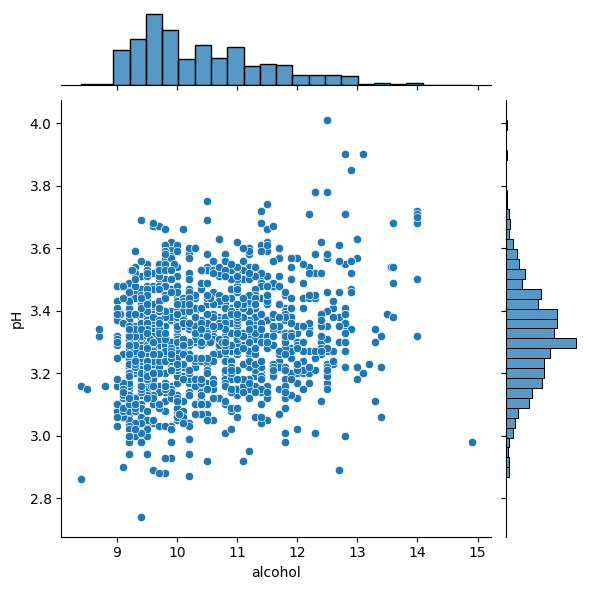

In [10]:
sns.jointplot(x='alcohol',y='pH',data=df)

<Axes: >

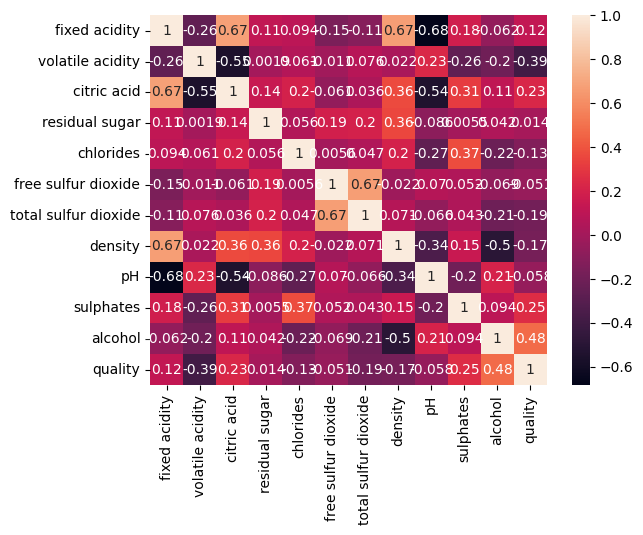

In [11]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [16]:
fx_01=df['fixed acidity'].quantile(0.01)
fx_98=df['fixed acidity'].quantile(0.98)
print(fx_01)
print(fx_98)

5.2
11.8


<Axes: >

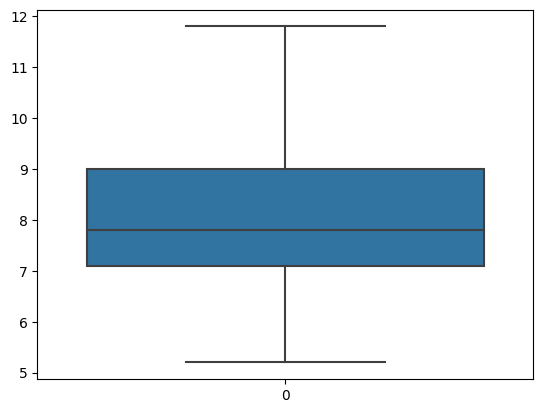

In [17]:
df=df[(df['fixed acidity']>=fx_01) & (df['fixed acidity']<=fx_98)]
sns.boxplot(df['fixed acidity'])

In [19]:
v1 = df['volatile acidity'].quantile(0.25) #Q1
v3 = df['volatile acidity'].quantile(0.75) #Q3
IQR_v = v3 - v1
upper_limit_v = v3+(1.5)*(IQR_v)
lower_limit_v = v1-(1.5)*(IQR_v)
print(v1)
print(v3)
print(IQR_v)
print(upper_limit_v)
print(lower_limit_v)

0.4
0.64
0.24
1.0
0.040000000000000036


<Axes: >

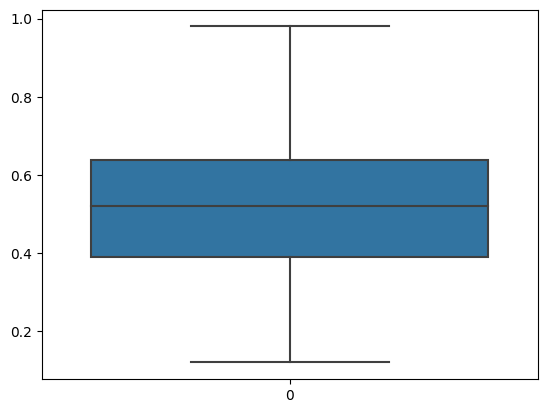

In [20]:
df=df[(df['volatile acidity']<upper_limit_v) & (df['volatile acidity']>lower_limit_v)]
sns.boxplot(df['volatile acidity'])

In [21]:
c1 = df['citric acid'].quantile(0.25) #Q1
c3 = df['citric acid'].quantile(0.75) #Q3
IQR_c = c3 - c1
upper_limit_c = c3+(1.5)*(IQR_c)
lower_limit_c = c1-(1.5)*(IQR_c)
print(c1)
print(c3)
print(IQR_c)
print(upper_limit_c)
print(lower_limit_c)

0.09
0.4
0.31000000000000005
0.8650000000000001
-0.3750000000000001


<Axes: >

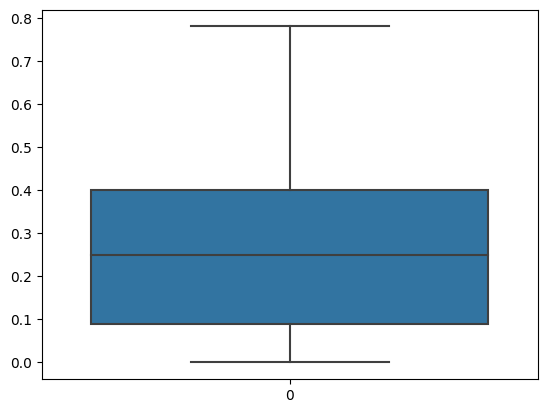

In [22]:
df=df[(df['citric acid']<upper_limit_c) & (df['citric acid']>lower_limit_c)]
sns.boxplot(df['citric acid'])

In [25]:
rs_02=df['residual sugar'].quantile(0.02)
rs_96=df['residual sugar'].quantile(0.96)
print(rs_02)
print(rs_96)

1.4
3.0


<Axes: >

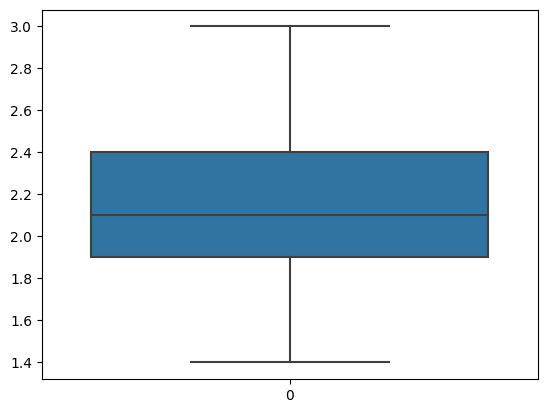

In [26]:
df=df[(df['residual sugar']>=rs_02) & (df['residual sugar']<=rs_96)]
sns.boxplot(df['residual sugar'])

In [27]:
fs1 = df['free sulfur dioxide'].quantile(0.25) #Q1
fs3 = df['free sulfur dioxide'].quantile(0.75) #Q3
IQR_fs = fs3 - fs1
upper_limit_fs = fs3+(1.5)*(IQR_fs)
lower_limit_fs = fs1-(1.5)*(IQR_fs)
print(fs1)
print(fs3)
print(IQR_fs)
print(upper_limit_fs)
print(lower_limit_fs)

8.0
21.0
13.0
40.5
-11.5


<Axes: >

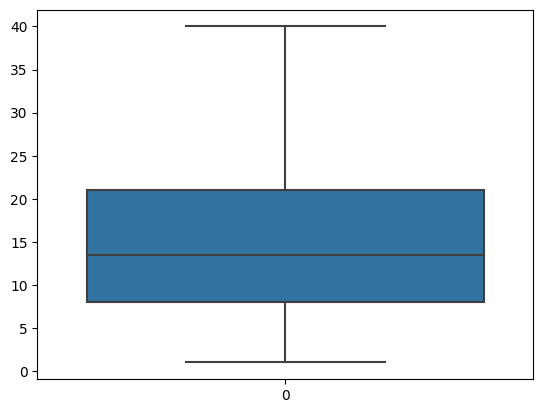

In [28]:
df=df[(df['free sulfur dioxide']<upper_limit_fs) & (df['free sulfur dioxide']>lower_limit_fs)]
sns.boxplot(df['free sulfur dioxide'])

In [39]:
d1 = df.density.quantile(0.25) #Q1
d3 = df.density.quantile(0.75) #Q3
IQR_d = d3 - d1
upper_limit_d = d3+(1.5)*(IQR_d)
lower_limit_d = d1-(1.5)*(IQR_d)
print(d1)
print(d3)
print(IQR_d)
print(upper_limit_d)
print(lower_limit_d)

0.9955575
0.9974525
0.00189499999999998
1.000295
0.992715


<Axes: >

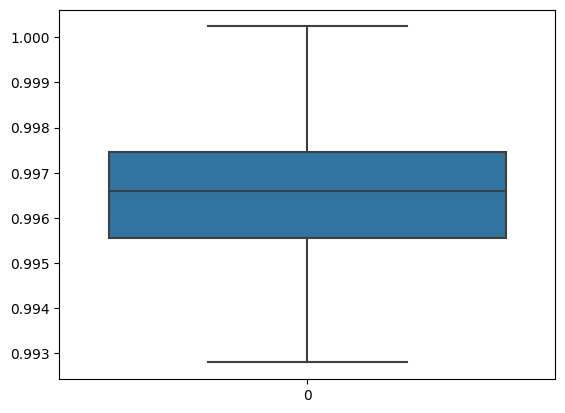

In [40]:
df=df[(df.density<upper_limit_d) & (df.density>lower_limit_d)]
sns.boxplot(df.density)

In [41]:
ch1 = df.chlorides.quantile(0.25) #Q1
ch3 = df.chlorides.quantile(0.75) #Q3
IQR_ch = ch3 - ch1
upper_limit_ch = ch3+(1.5)*(IQR_ch)
lower_limit_ch = ch1-(1.5)*(IQR_ch)
print(ch1)
print(ch3)
print(IQR_ch)
print(upper_limit_ch)
print(lower_limit_ch)

0.07025
0.089
0.01874999999999999
0.11712499999999998
0.042125000000000024


In [43]:
ch_01=df.chlorides.quantile(0.01)
ch_97=df.chlorides.quantile(0.97)
print(ch_01)
print(ch_97)

0.04838
0.1078599999999999


<Axes: >

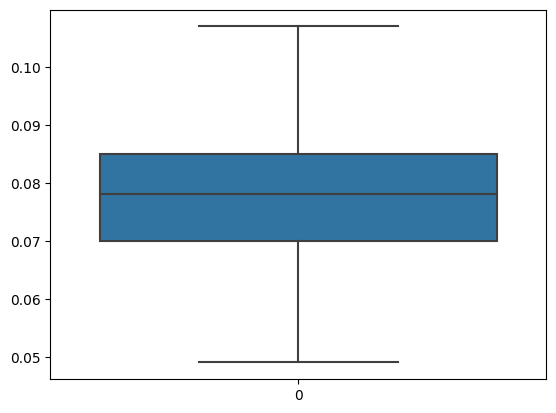

In [44]:
df=df[(df.chlorides>=ch_01) & (df.chlorides<=ch_97)]
sns.boxplot(df.chlorides)

## Machine Learning Model building

In [45]:
X =df.iloc[:,:-1]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [48]:
Y =df.quality
Y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

Conidering alcohol quality > 5.5 as good quality and assigning '1' to it else assigning '0'

In [51]:
Y = df['quality'].apply(lambda y_value: 1 if y_value>=5.5 else 0)
Y

0       0
1       0
2       0
3       1
4       0
       ..
1593    1
1594    0
1595    1
1596    1
1597    0
Name: quality, Length: 1092, dtype: int64

##Training and Test Set

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [122]:
X_train.shape

(982, 11)

In [123]:
X_test.shape

(110, 11)

In [124]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1092,) (982,) (110,)


## Evaluating the Model

Decision Tree Classifier

In [125]:
from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier(max_depth=2,splitter='best',criterion='entropy')
model_1.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [126]:
d_y_predict = model_1.predict(X_test)
d_y_predict

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1])

In [127]:
d_y_predict_train = model_1.predict(X_train)

In [128]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Testing Accuracy = ', accuracy_score(Y_test,d_y_predict))
print('Training Accuracy = ', accuracy_score(Y_train,d_y_predict_train))

Testing Accuracy =  0.7363636363636363
Training Accuracy =  0.7138492871690427


Random Forest Classifier Model

In [129]:
from sklearn.ensemble import RandomForestClassifier
model_2 =RandomForestClassifier(n_estimators=200,criterion='entropy')
model_2.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [130]:
r_y_predict = model_2.predict(X_test)
r_y_predict_train = model_2.predict(X_train)

In [131]:
print('Testing Accuracy = ', accuracy_score(Y_test,r_y_predict))
print('Training Accuracy = ', accuracy_score(Y_train,r_y_predict_train))

Testing Accuracy =  0.8454545454545455
Training Accuracy =  1.0


Naive Bayesian Classification Model

In [132]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [133]:
y_pred2 = gnb.predict(X_test)
y_pred2

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [134]:
from sklearn.metrics import accuracy_score
gnb_acc=accuracy_score(Y_test,y_pred2)
gnb_acc

0.7

## Testing with random observations

In [135]:
input_data = [9.9, 1.0, 0, 5.0, 0.05, 40, 100, 0.85, 6.5, 0.63, 12.5]

In [136]:
prediction = model_1.predict([input_data])
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

*According to "decision tree classifier" model, the above random observation gives prediction "array([1])" i.e., good quality alcohol*

In [137]:
prediction2 = model_2.predict([input_data])
prediction2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

*According to "Random Forest classifier" model, the above random observation gives prediction "array([1])" i.e., good quality alcohol*

In [138]:
prediction3 = gnb.predict([input_data])
prediction3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

*According to "Naive Bayesian classifier" model, the above random observation gives prediction "array([1])" i.e., good quality alcoho*l